In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

In [2]:
from sklearn.datasets import make_blobs

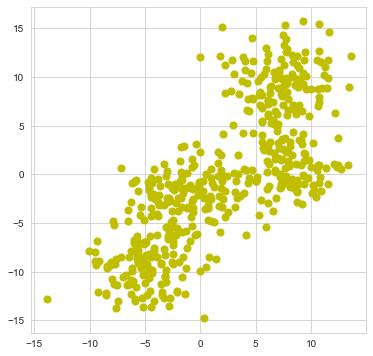

In [7]:
from sklearn.datasets import make_blobs

X,Y = make_blobs(n_samples = 500, centers = 4, random_state =8, cluster_std =2.4)


plt.figure(figsize = (6,6))
plt.scatter(X[:, 0], X[:,1], c = 'y', s =50, cmap = 'jet')

In [8]:
from sklearn.tree import DecisionTreeClassifier


In [9]:
def visualize_tree(classifier, X, y, boundaries=True,xlim=None, ylim=None):
    '''
    Visualizes a Decision Tree. 
    INPUTS: Classifier Model, X, y, optional x/y limits.
    OUTPUTS: Meshgrid visualization for boundaries of the Decision Tree
    '''
     
    # Fit the X and y data to the tree
    classifier.fit(X, y)

    
    # Automatically set the x and y limits to the data (+/- 0.1)
    if xlim is None:
        xlim = (X[:, 0].min() - 0.1, X[:, 0].max() + 0.1)
    if ylim is None:
        ylim = (X[:, 1].min() - 0.1, X[:, 1].max() + 0.1)

    # Assign the variables
    x_min, x_max = xlim
    y_min, y_max = ylim
    
    
    # Create a mesh grid
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Define the Z by the predictions (this will color in the mesh grid)
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

    # Reshape based on meshgrid
    Z = Z.reshape(xx.shape)
    
    # Plot the figure (use)
    plt.figure(figsize=(10,10))
    plt.pcolormesh(xx, yy, Z, alpha=0.2, cmap='jet')
    

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='jet')
    
    #Set Limits
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)        
    
    def plot_boundaries(i, xlim, ylim):
        '''
        Plots the Decision Boundaries
        '''
        if i < 0:
            return

        # Shorter variable name
        tree = classifier.tree_
        
        # Recursively go through nodes of tree to plot boundaries.
        if tree.feature[i] == 0:
            plt.plot([tree.threshold[i], tree.threshold[i]], ylim, '-k')
            plot_boundaries(tree.children_left[i],
                            [xlim[0], tree.threshold[i]], ylim)
            plot_boundaries(tree.children_right[i],
                            [tree.threshold[i], xlim[1]], ylim)
        
        elif tree.feature[i] == 1:
            plt.plot(xlim, [tree.threshold[i], tree.threshold[i]], '-k')
            plot_boundaries(tree.children_left[i], xlim,
                            [ylim[0], tree.threshold[i]])
            plot_boundaries(tree.children_right[i], xlim,
                            [tree.threshold[i], ylim[1]])
    
    # Random Forest vs Single Tree
    if boundaries:
        plot_boundaries(0, plt.xlim(), plt.ylim())

/var/folders/_5/4vp6h6ss41d4q7wzd5r8jmcw0000gn/T/ipykernel_7306/196598620.py:35: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.pcolormesh(xx, yy, Z, alpha=0.2, cmap='jet')


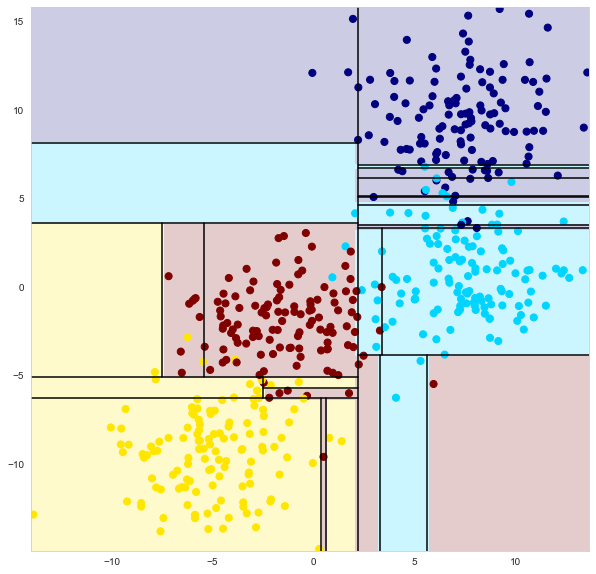

In [22]:
clf = DecisionTreeClassifier(max_depth = 5, random_state = 0)

visualize_tree(clf, X, Y)

/var/folders/_5/4vp6h6ss41d4q7wzd5r8jmcw0000gn/T/ipykernel_7306/196598620.py:35: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.pcolormesh(xx, yy, Z, alpha=0.2, cmap='jet')


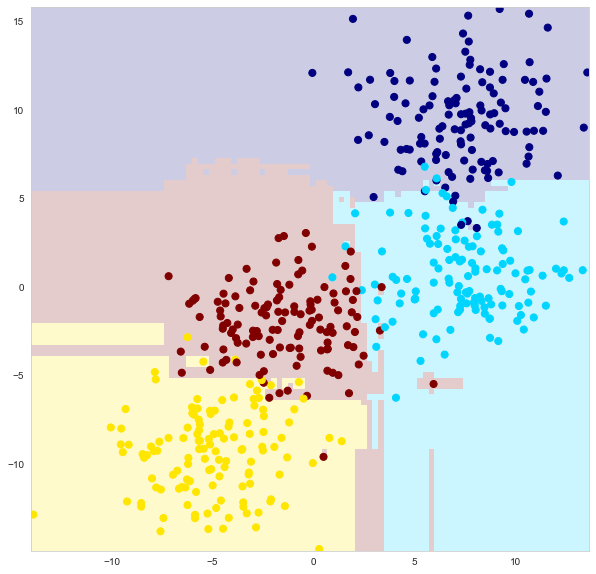

In [24]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 100, random_state = 0)

visualize_tree(clf, X, Y, boundaries = False)

In [25]:
 x = 10 * np.random.rand(100)

In [26]:
def sin_model(x, sigma = 0.2):
    noise  = sigma * np.random.rand(len(x))
    return np.sin(5*x) + np.sin(0.5 * x) + noise

In [27]:
y = sin_model(x)

<ErrorbarContainer object of 3 artists>

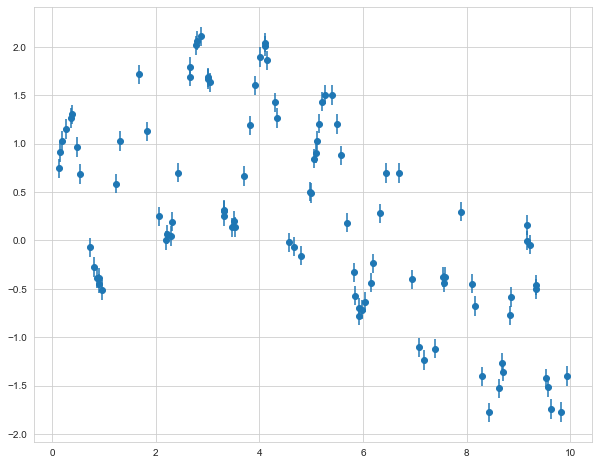

In [29]:
plt.figure(figsize = (10, 8))

plt.errorbar(x, y, 0.1, fmt = 'o')

In [32]:
from sklearn.ensemble import RandomForestRegressor
xfit = np.linspace(0, 10, 1000)

rfr = RandomForestRegressor(100)

rfr.fit(x[:, None], y)

yfit = rfr.predict(xfit[:, None])

In [33]:
ytrue = sin_model(xfit, 0)

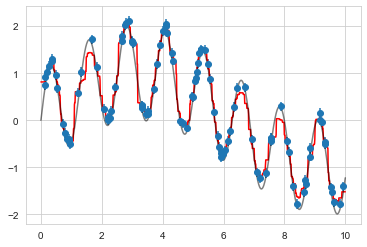

In [34]:
plt.errorbar(x,y, 0.1, fmt = 'o')

plt.plot(xfit, yfit, '-r')

plt.plot(xfit, ytrue, '-k', alpha = 0.5)